In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/perturb/clustered_mean_gene_expression_figs2-4.csv", sep=",", index_col=0, low_memory=False)
df = df.iloc[2:, 1:]
name2mean = df.mean(axis=1).to_dict()
name2std = df.std(axis=1).to_dict()

In [3]:
id2name = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t", index_col=0)["genes"].to_dict()
dagma = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", header=None, sep="\t")
dagma[0] = dagma[0].map(id2name)
dagma[1] = dagma[1].map(id2name)

In [4]:
dagma_gene = set.union(set(dagma[0]), set(dagma[1]))

In [5]:
genes = pd.DataFrame(list(id2name.values()))
genes["ExpMean"] = genes[0].map(name2mean)
genes["ExpStd"] = genes[0].map(name2std)

In [6]:
genes["LatentDAG"] = genes[0].isin(dagma_gene)

In [7]:
genes = genes.sort_values('LatentDAG', ascending=False)

In [8]:
genes = genes.reset_index(drop=True).copy()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [10]:
mannwhitneyu(genes[genes['LatentDAG']]["ExpMean"].abs(), genes[~genes['LatentDAG']]["ExpMean"].abs())

MannwhitneyuResult(statistic=288230.0, pvalue=3.813497239777447e-18)

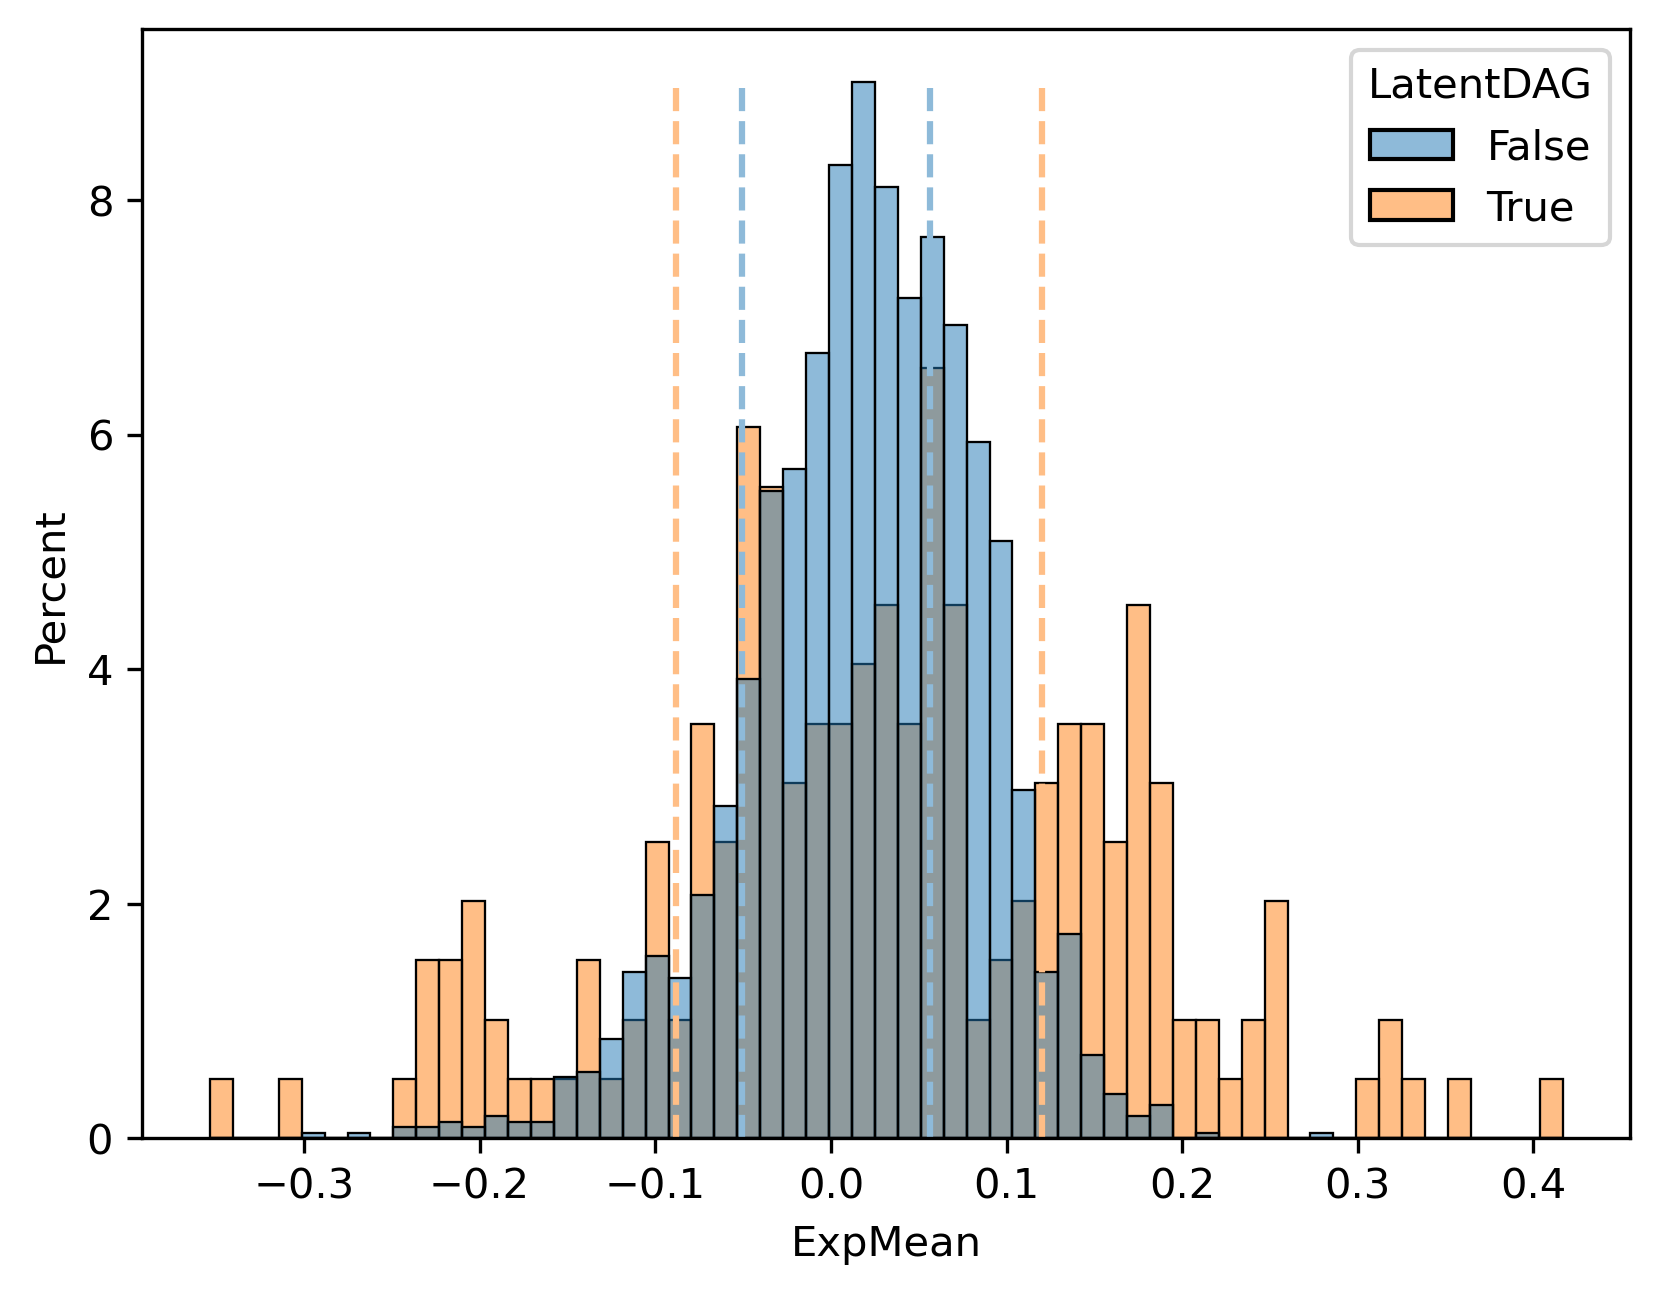

In [11]:
plt.figure(dpi=300)
sns.histplot(data=genes, x="ExpMean", hue="LatentDAG", common_norm=False, stat='percent')
ax = plt.gca()
ax.vlines(genes.loc[genes['LatentDAG'] & (genes["ExpMean"]>=0), "ExpMean"].mean(), ymin=0, ymax=9, color="#FFBE86", linestyles="dashed")
ax.vlines(genes.loc[genes['LatentDAG'] & (genes["ExpMean"]<0), "ExpMean"].mean(), ymin=0, ymax=9, color="#FFBE86", linestyles="dashed")
ax.vlines(genes.loc[~genes['LatentDAG'] & (genes["ExpMean"]>=0), "ExpMean"].mean(), ymin=0, ymax=9, color="#8EBAD9", linestyles="dashed")
ax.vlines(genes.loc[~genes['LatentDAG'] & (genes["ExpMean"]<0), "ExpMean"].mean(), ymin=0, ymax=9, color="#8EBAD9", linestyles="dashed")
plt.savefig("figureS10_mean.pdf", dpi="figure", bbox_inches='tight')

In [12]:
mannwhitneyu(genes[genes['LatentDAG']]["ExpStd"], genes[~genes['LatentDAG']]["ExpStd"])

MannwhitneyuResult(statistic=410207.0, pvalue=2.142880238697301e-109)

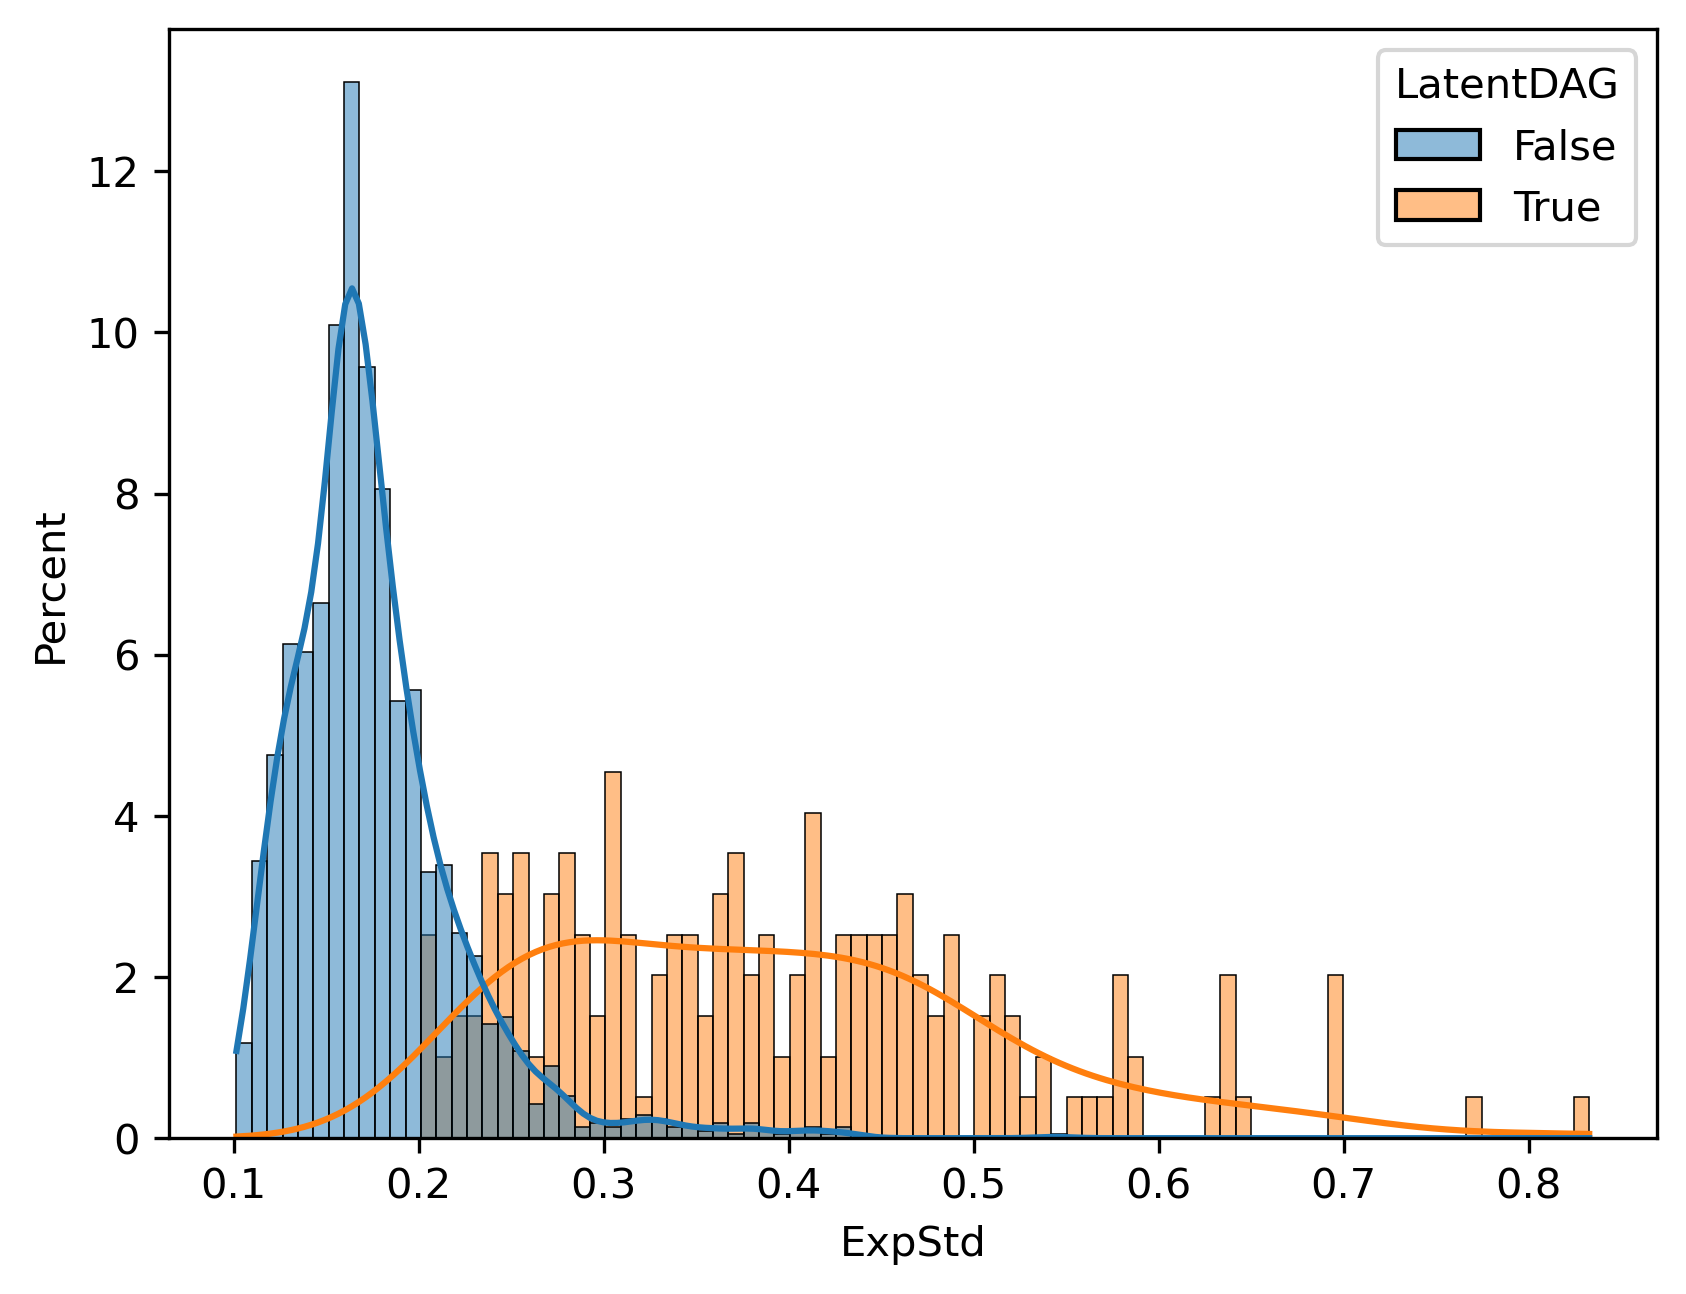

In [13]:
plt.figure(dpi=300)
sns.histplot(data=genes, x="ExpStd", hue="LatentDAG", common_norm=False, kde=True, stat='percent')
plt.savefig("figureS10_std.pdf", dpi="figure", bbox_inches='tight')